<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/GradientsEdges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple du calcul de gradients et d'extraction d'arêtes 

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

Lecture de l'image en tons de gris et affichage. Le calcul des gradients sur une image est toujours sur l'image d'intensité.

In [2]:
image_name = 'bureau.jpg'
if not os.path.exists(image_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/bureau.jpg

Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/bureau.jpg
To: /content/bureau.jpg
100% 21.9k/21.9k [00:00<00:00, 1.42MB/s]


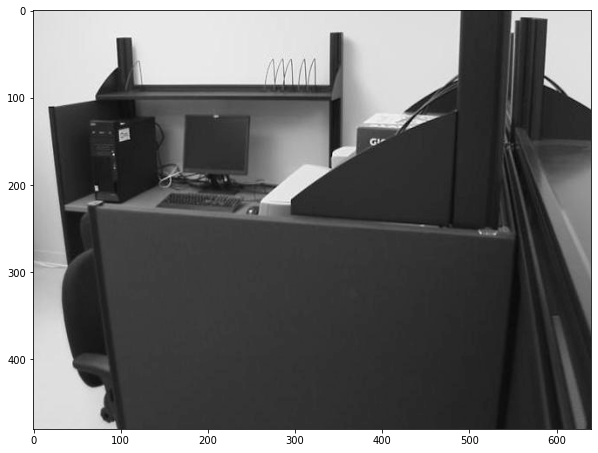

In [3]:
image = cv2.imread(image_name,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (10,10))
plt.imshow(image,cmap = plt.get_cmap('gray'))
plt.show()

Calcul de la convolution avec les filtres de Sobel selon l'axe X et l'axe Y.

In [4]:
Gx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
Gy = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)

Les gradients peuvent être positifs ou négatifs. Pour l'affichage, on fait la valeur absolue et on normalise les valeurs entre 0 et 255. Affichage pour l'axe X. On détecte bien les lignes verticales, mais pas très bien les lignes horizontales.

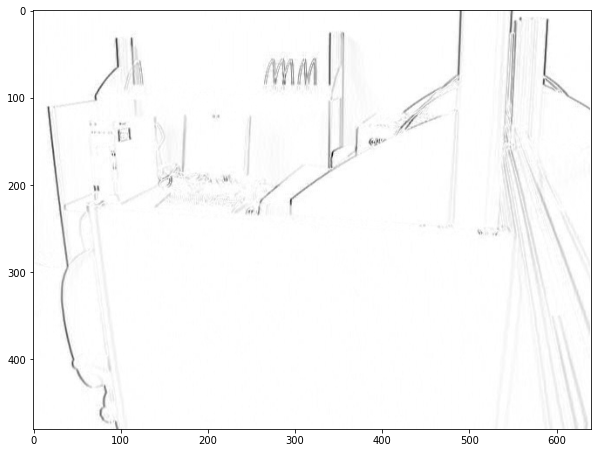

In [5]:
Gxout =  np.absolute(Gx)
Gxout = Gxout * 255/np.max(Gxout)
plt.figure(figsize = (10,10))
plt.imshow(Gxout,cmap = plt.get_cmap('binary'))
plt.show()

Affichage pour l'axe Y. On détecte bien les lignes horizontales. La combinaison des 2 filtres permet de bien détecter les diagonales. 

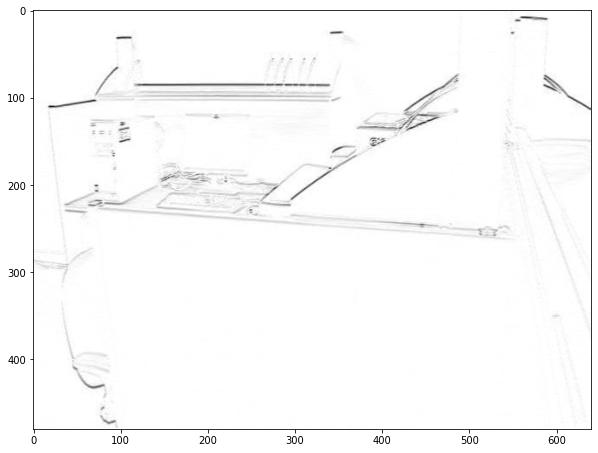

In [6]:
Gyout =  np.absolute(Gy)
Gyout = Gyout * 255/np.max(Gyout)
plt.figure(figsize = (10,10))
plt.imshow(Gyout,cmap = plt.get_cmap('binary'))
plt.show()

Affichage des matrices de gradients. Il y a des valeurs réelles positives et négatives.

Extraction d'arêtes à partir des gradients. On calcule la force des gradients, et ensuite on seuille la force des gradients calculée.

In [7]:
ForceGradient = np.sqrt(np.power(Gx,2)+np.power(Gy,2))

Gradients plus fort que 80. 

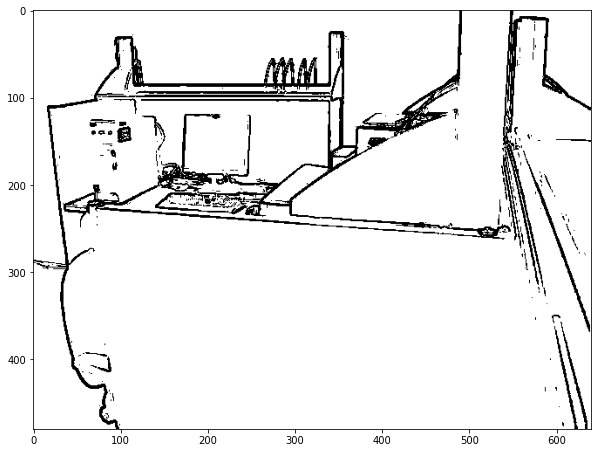

In [8]:
aretes = ForceGradient>80
plt.figure(figsize = (10,10))
plt.imshow(aretes, plt.get_cmap('binary'))
plt.show()

Gradients plus fort que 150. Le seuillage permet d'obtenir différents niveaux de détails. 

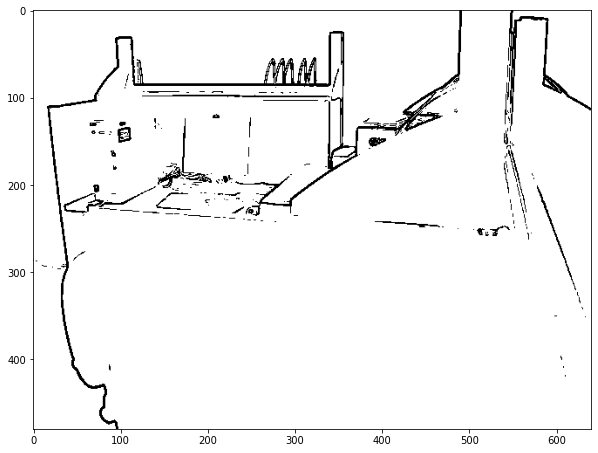

In [9]:
aretes = ForceGradient>150
plt.figure(figsize = (10,10))
plt.imshow(aretes, plt.get_cmap('binary'))
plt.show()